In [1]:
import numpy as np 
from qclab.algorithms import MeanField
from qclab.models import HolsteinLatticeModel
from qclab import Simulation
from qclab.dynamics import serial_driver


# simulation parameters 
simulation_parameters = dict(dt = 0.001, tmax = 10, num_trajs = 1000, batch_size = 100)
sim = Simulation(simulation_parameters)
model_parameters = dict(N = 10, j = 1.0,w = 1.0, g = .01, periodic_boundary = True)
sim.model = HolsteinLatticeModel(model_parameters)
sim.algorithm = MeanField()


wf_db_0 = np.zeros(sim.model.parameters.N) + 0.0j
wf_db_0[0] = 1.0+0.0j
sim.state.add('wf_db', wf_db_0)

data = serial_driver(sim)


100%|██████████| 10001/10001 [00:12<00:00, 826.33it/s]


1000


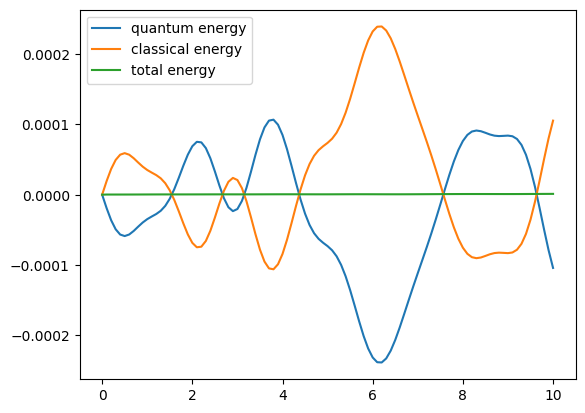

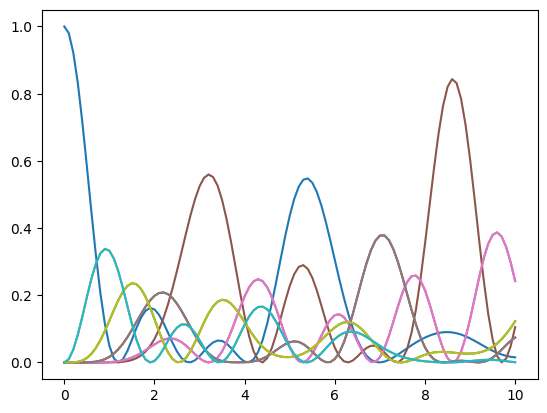

In [3]:
ntraj = len(data.data_dic['seed'])
print(ntraj)
eq = np.real(data.data_dic['quantum_energy']/ntraj)
ec = np.real(data.data_dic['classical_energy']/ntraj)
pops = np.real(np.einsum('tii->ti', data.data_dic['dm_db']/ntraj))

import matplotlib.pyplot as plt
plt.plot(sim.parameters.tdat_output, eq-eq[0], label='quantum energy')
plt.plot(sim.parameters.tdat_output,ec-ec[0], label='classical energy') 
plt.plot(sim.parameters.tdat_output,eq-eq[0] + ec-ec[0], label='total energy') 
plt.legend()
plt.show()
plt.plot(sim.parameters.tdat_output,pops)
plt.show()